<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.6f}'.format

In [3]:
df = pd.read_csv("data/datos_tratados.csv")

In [4]:
df["monthOfRegistration"].astype("category")

0         0
1         5
2         8
3         6
4         7
         ..
350051    1
350052    3
350053    3
350054    6
350055    8
Name: monthOfRegistration, Length: 350056, dtype: category
Categories (13, int64): [0, 1, 2, 3, ..., 9, 10, 11, 12]

In [5]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[["powerCV"]])
df[["powerCV_robust"]] = datos_transf_robust

escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df[["powerCV"]])
df[["powerCV_mm"]]  = datos_transf_min_max

escalador_norm = Normalizer()
datos_transf_norm = escalador_norm.fit_transform(df[["powerCV"]])
df[["powerCV_norm"]]  = datos_transf_norm

escalador_estandar = StandardScaler()
datos_transf_estandar = escalador_estandar.fit_transform(df[["powerCV"]])
df[["powerCV_estandar"]]  = datos_transf_estandar

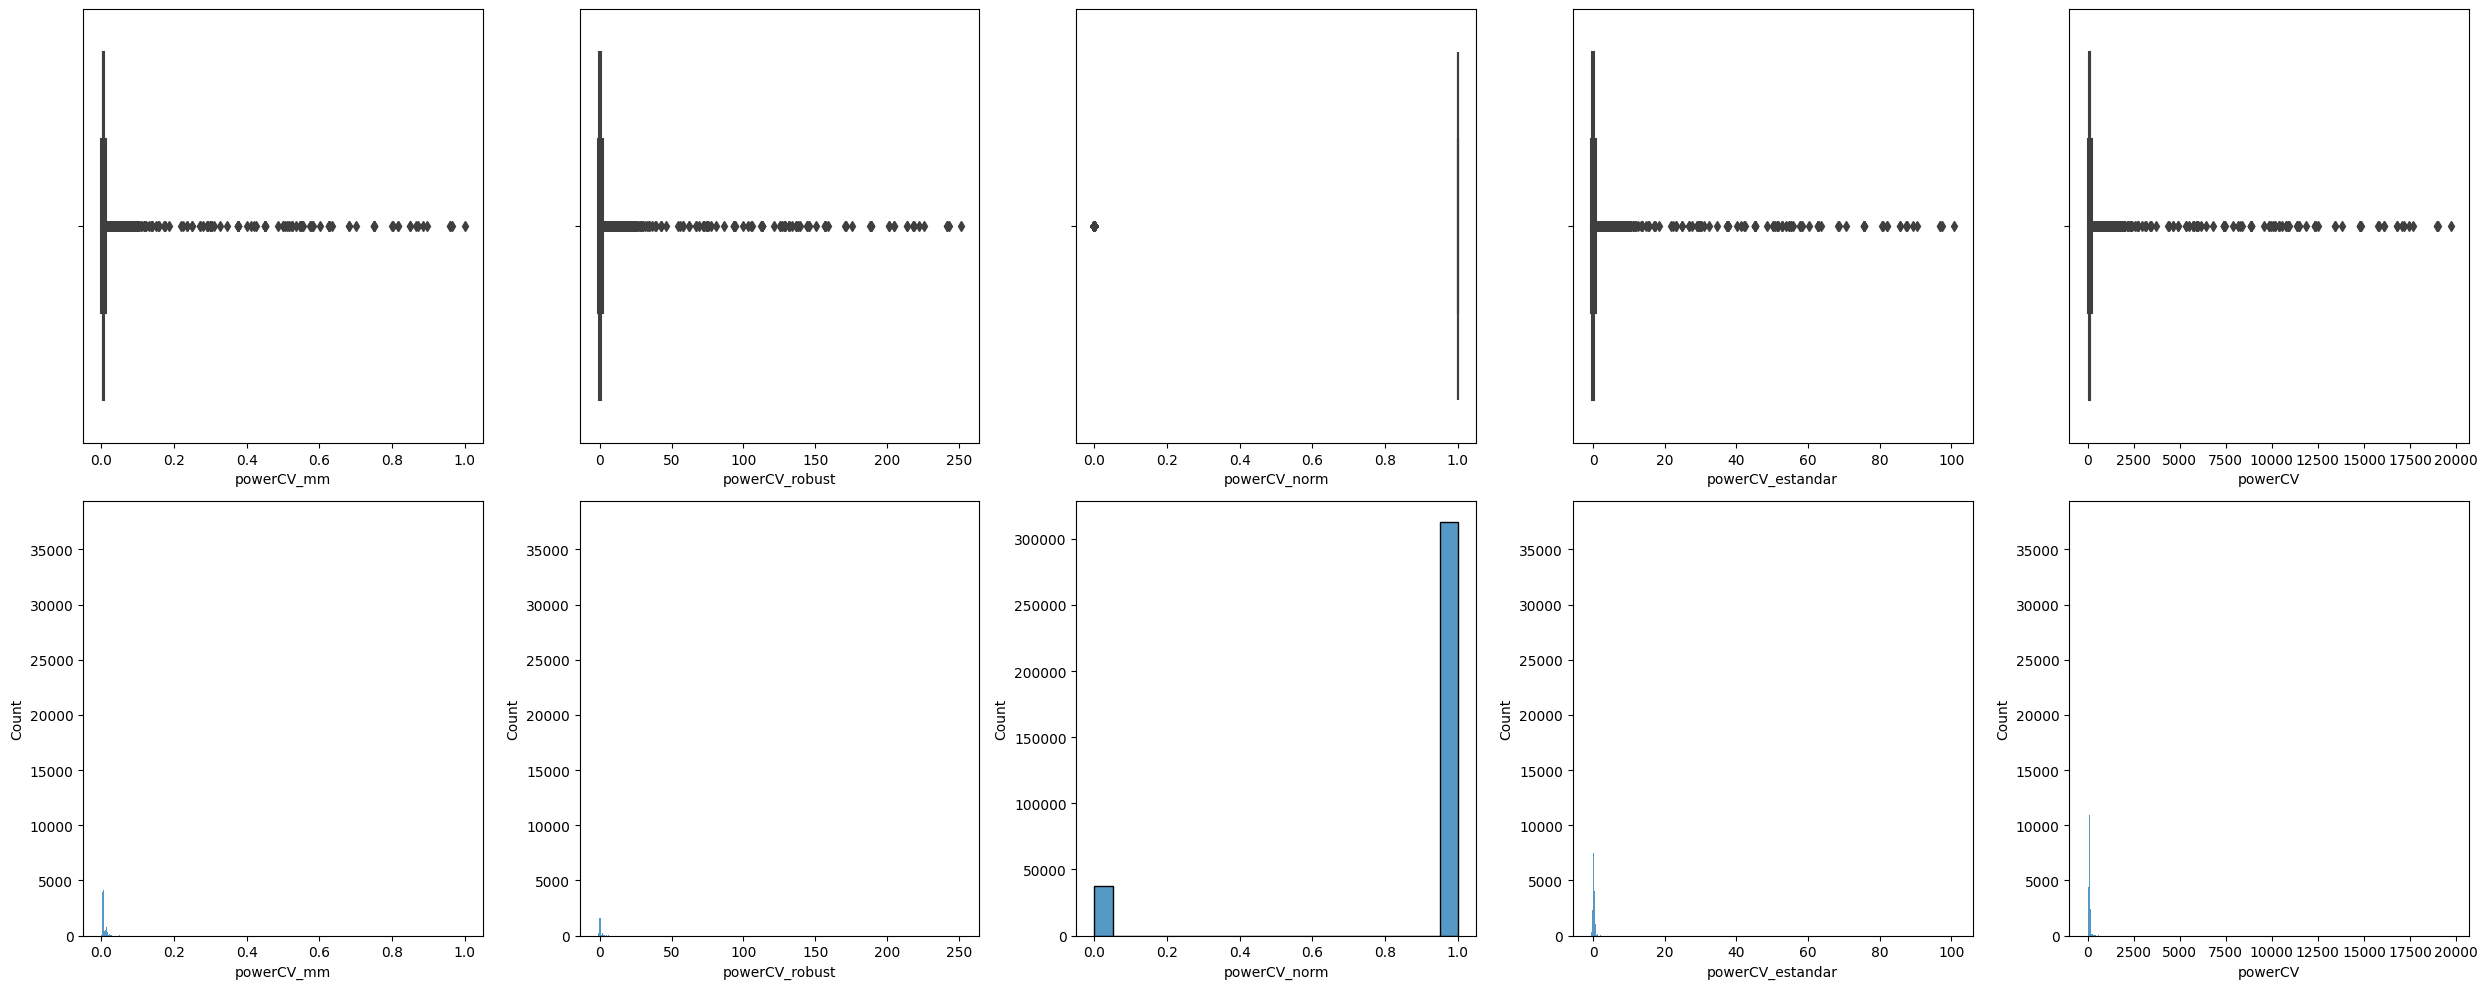

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

sns.boxplot(x="powerCV_mm", data=df, ax=axes[0][0])
sns.boxplot(x="powerCV_robust", data=df, ax=axes[0][1])
sns.boxplot(x="powerCV_norm", data=df, ax=axes[0][2])
sns.boxplot(x="powerCV_estandar", data=df, ax=axes[0][3])
sns.boxplot(x="powerCV", data=df, ax=axes[0][4])

sns.histplot(x="powerCV_mm", data=df, ax=axes[1][0])
sns.histplot(x="powerCV_robust", data=df, ax=axes[1][1])
sns.histplot(x="powerCV_norm", data=df, ax=axes[1][2])
sns.histplot(x="powerCV_estandar", data=df, ax=axes[1][3])
sns.histplot(x="powerCV", data=df, ax=axes[1][4])

plt.tight_layout()
plt.show()


#### Nos quedamos con *estandar* ya que tenemos outliers los cuales creemos que no son reales

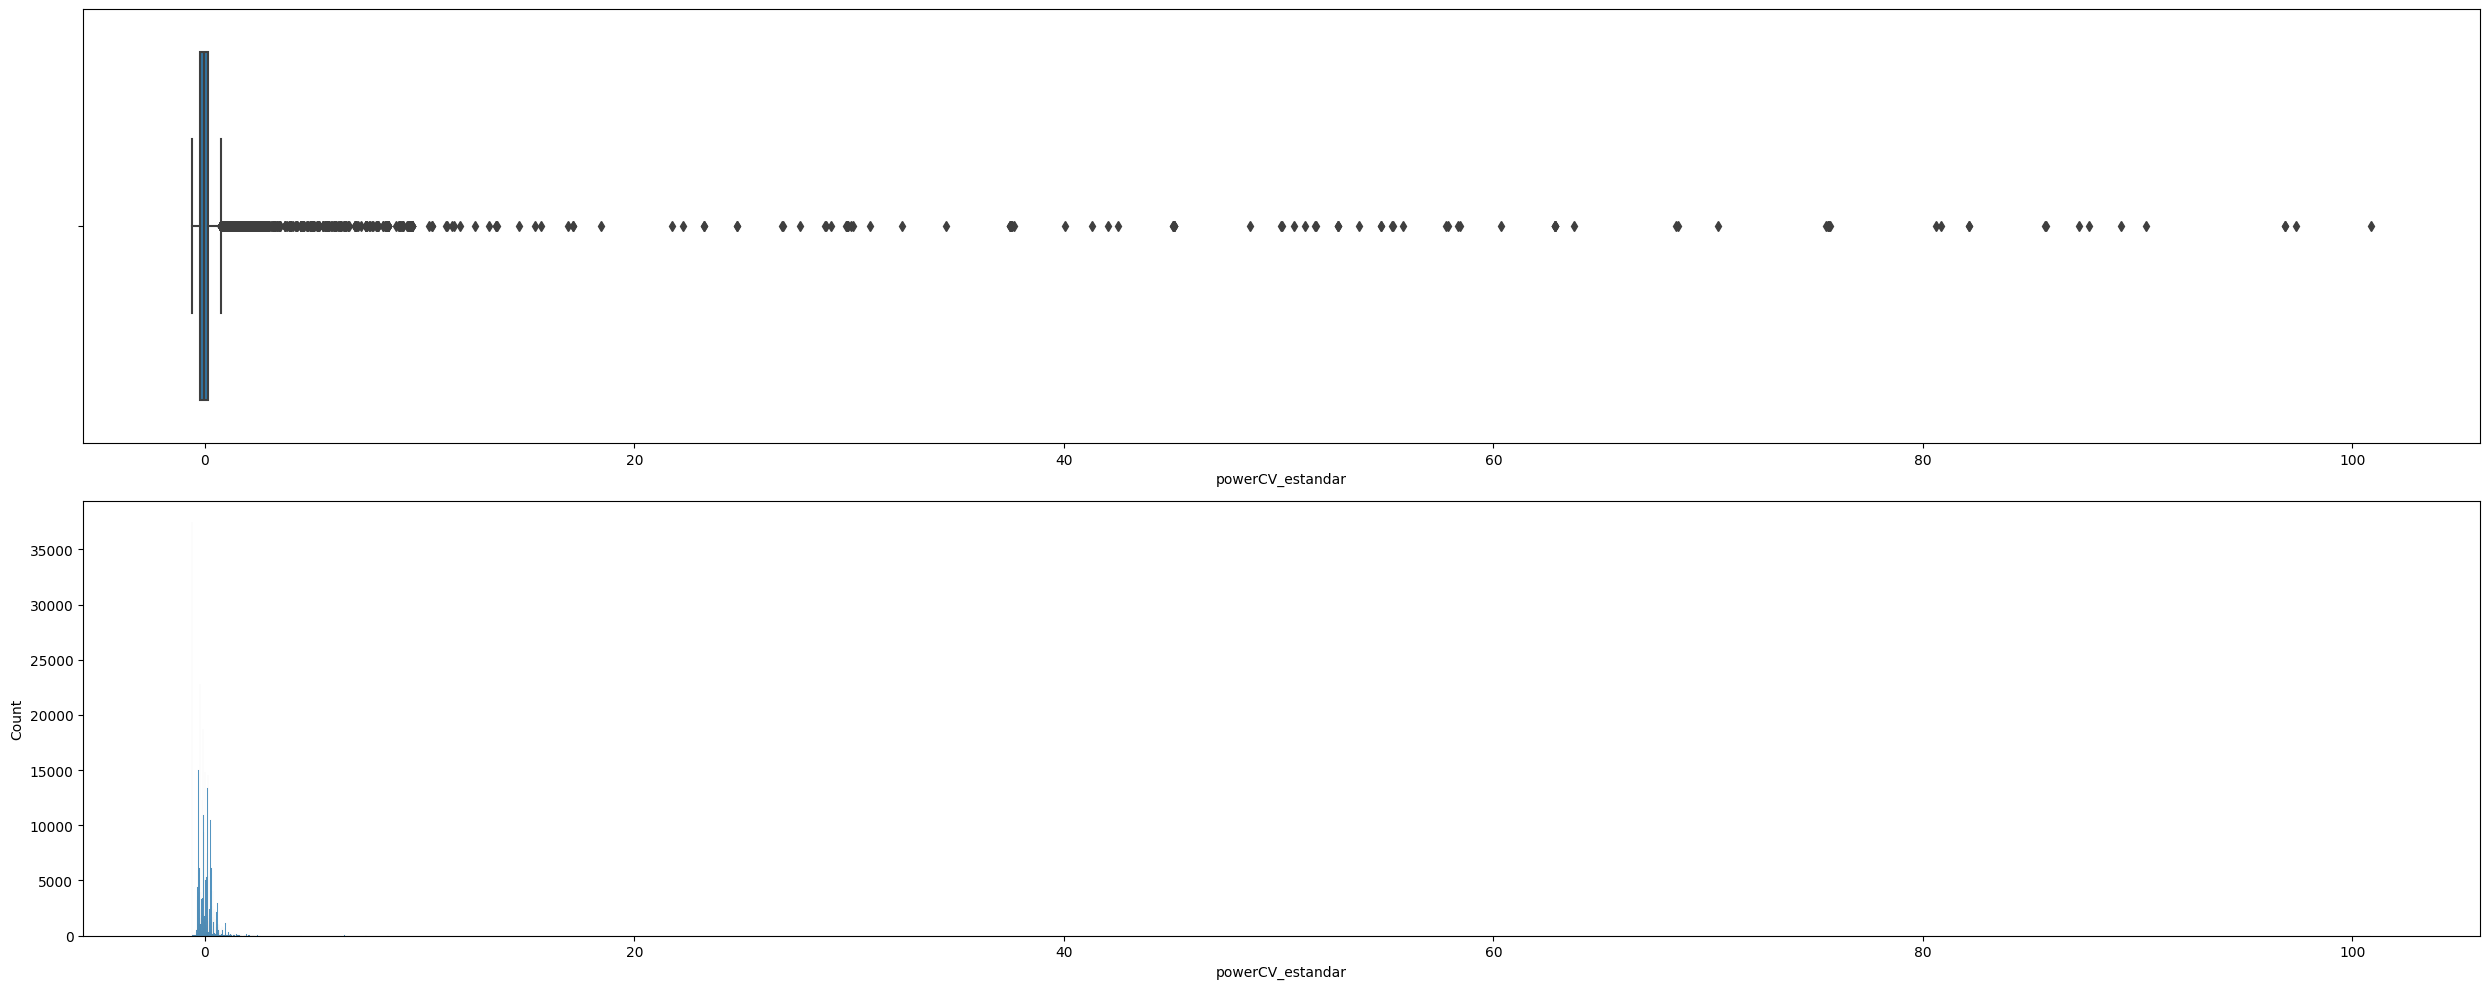

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 10))


sns.boxplot(x="powerCV_estandar", data=df, ax=axes[0])
sns.histplot(x="powerCV_estandar", data=df, ax=axes[1])

plt.tight_layout()
plt.show()

### Análisis de la gráfica

#### Gráfico superior: boxplot (diagrama de caja y bigotes)
- Este gráfico muestra un boxplot para la variable `powerCV_estandar`, donde se puede observar que la mayoría de los valores están **concentrados cerca de cero**.  

- Existe una gran cantidad de **outliers** (valores atípicos) hacia la derecha, que se extienden a valores mucho más altos (más allá de 100, lo podemos ver en el describe de abajo).  


In [8]:
df["powerCV_estandar"].describe()

count   350056.000000
mean         0.000000
std          1.000001
min         -0.589563
25%         -0.229536
50%         -0.054666
75%          0.171636
max        100.865928
Name: powerCV_estandar, dtype: float64

In [9]:
df.to_csv("data/datos_estandarizados.csv")